In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold # for Cross Validation
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.backend import sigmoid
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.models import Model

2.0.0


In [3]:
from scipy.io import loadmat
data = loadmat('OASBUD.mat')['data'][0] # mat file is dict with header, we just want the data key (which is stored as a list of lists)
# each of the 100 data points consists of 7 arrays
# array 0: patient's unique ID
# array 1: first scan plane (first set of rf dta)
# array 2: second scan plane (second set of rf data)
# array 3: region of interest for first scan plane
# array 4: region of interest for second scan plane
# array 5: BI-RADS category (low, medium, high probability of malignancy)
# array 6: label (0 = benign, 1 = malignant)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


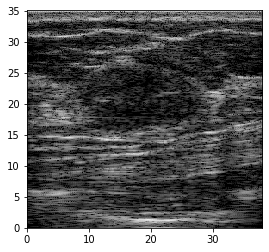

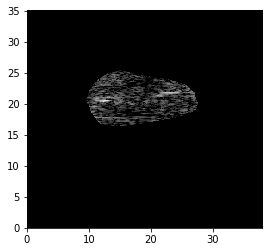

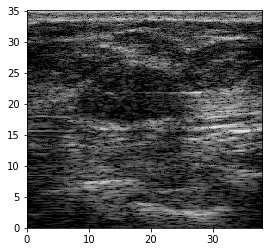

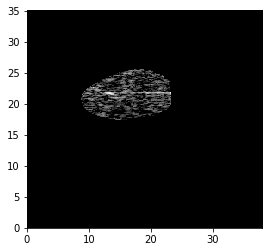

In [12]:
from scipy.signal import hilbert
# example image processing of first data point (both scan planes):
c = 1540
width = 38
fs = 40e6
rf1 = data[0][1]
rf2 = data[0][2]
roi1 = data[0][3]
roi2 = data[0][4]

print(roi1)

# hilbert transform and log compression on the envelope of the image
envelope_image1=np.abs(hilbert(rf1))
envelope_image1= 20 * np.log10(envelope_image1/np.max(envelope_image1))

envelope_image2 = np.abs(hilbert(rf2))
envelope_image2 = 20 * np.log10(envelope_image2/np.max(envelope_image2))

# Preprocessing to 0-255 with a 50 db threshold
leftMin=-50.0
leftMax=0.0
rightMin=0.0
rightMax=255.0

for row in range(len(envelope_image1)):
    for column in range(len(envelope_image1[0])):
        if envelope_image1[row][column] <= leftMin:
            envelope_image1[row][column] = float(-50.0)
for row in range(len(envelope_image2)):
    for column in range(len(envelope_image2[0])):
        if envelope_image2[row][column] <= leftMin:
            envelope_image2[row][column] = float(-50.0)
leftSpan = leftMax-leftMin
rightSpan=rightMax-rightMin

valueScaled1 =(envelope_image1-leftMin)/(leftSpan)
envelope_image1 = rightMin+ (valueScaled1*rightSpan)

valueScaled2 =(envelope_image2-leftMin)/(leftSpan)
envelope_image2 = rightMin+ (valueScaled2*rightSpan)

plt.imshow(envelope_image1, cmap='gray', extent=[0, width, 0, rf1.shape[0]*500*c/fs])
plt.show()

envelope_image1 = np.multiply(envelope_image1, roi1)
plt.imshow(envelope_image1, cmap='gray', extent=[0, width, 0, rf1.shape[0]*500*c/fs])
plt.show()

plt.imshow(envelope_image2, cmap='gray', extent=[0, width, 0, rf2.shape[0]*500*c/fs])
plt.show()

envelope_image2 = np.multiply(envelope_image2, roi2)
plt.imshow(envelope_image2, cmap='gray', extent=[0, width, 0, rf2.shape[0]*500*c/fs])
plt.show()